# Importing Neccessary Libraries

Dataset: https://www.kaggle.com/datasets/shawkyelgendy/fake-news-football?resource=download

In [1]:
import re,string,unicodedata
import numpy as np 
import pandas as pd
import seaborn as sns

import nltk
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('bmh')



# Loading in the dataset

In [2]:
# Loading in for fake and real dataset
fake_data = pd.read_csv('fake.csv')
real_data = pd.read_csv('real.csv')

In [3]:
def count_digit(num):
    count = 0
    while num != 0:
        num //= 10
        count += 1
    return count

def check_shape(df):
    rows, cols = df.shape
    print("\nNumber of rows in dataset: {}".format(rows))
    print("==========================={}".format(count_digit(rows)*'='))
    print("\nNumber of columns in dataset: {}".format(cols))
    print("=============================={}".format(count_digit(cols)*'='))
    
def modelEvaluation(predictions, y_test_set, model_name):
    class_labels = ["True", "False"]
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set,predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='jet', xticklabels=class_labels, yticklabels=class_labels)
   
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions,average='macro'),
              recall_score(y_test_set, predictions,average='macro'),f1_score(y_test_set, predictions,average='macro')]#store results of model
    return results

In [4]:
check_shape(fake_data)
fake_data.head()


Number of rows in dataset: 19999

Number of columns in dataset: 1


,tweet
0,"the tongue of his condition, now i saw things ..."
1,"by god the great, after i saw the derby of wyd..."
2,"believe in god, this zamalek fans are as good ..."
3,the coach appeared in the media and told the t...
4,asno smito\nwhoever knows her tells me a massa...


In [5]:
check_shape(real_data)
real_data.head()


Number of rows in dataset: 21869

Number of columns in dataset: 1


,tweet
0,sun downs technical director: al-ahly respecte...
1,shawky gharib after the tie with enppi: our go...
2,"egyptian sports news today, wednesday 1/25/202..."
3,the main referees committee of the egyptian fo...
4,"haji bari, the striker of the future team, is ..."


# Checking and removal for null values

In [6]:
# Checking of null values in fake_data
null_counts = fake_data.isnull().sum()
print("Null Values:", null_counts)

Null Values: tweet    11
dtype: int64


In [7]:
# Removing rows with null values
fake_data = fake_data.dropna()

In [8]:
# Verifying that null valus are removed
updated_null_counts = fake_data.isnull().sum()
print("Updated Null Values:", updated_null_counts)
check_shape(fake_data)

Updated Null Values: tweet    0
dtype: int64

Number of rows in dataset: 19988

Number of columns in dataset: 1


In [9]:
# Checking of null values in real_data
null_counts = real_data.isnull().sum()
print("Null Values:", null_counts)

Null Values: tweet    6
dtype: int64


In [10]:
# Removing rows with null values
real_data = real_data.dropna()

In [11]:
# Verifying that null values are removed 
updated_null_counts = real_data.isnull().sum()
print("Updated Null Values:", updated_null_counts)
check_shape(real_data)

Updated Null Values: tweet    0
dtype: int64

Number of rows in dataset: 21863

Number of columns in dataset: 1


# Comparing Fake News vs Real News

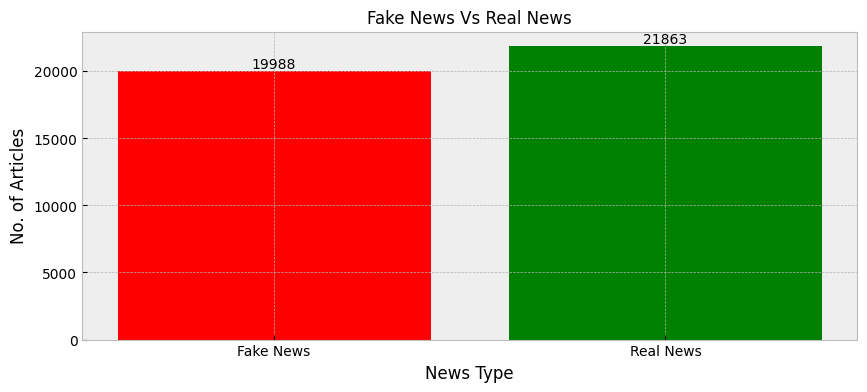

In [12]:
plt.figure(figsize=(10, 4))
plt.bar('Fake News', len(fake_data), color='red')
plt.bar('Real News', len(real_data), color='green')
plt.title('Fake News Vs Real News', size=12)
plt.xlabel('News Type', size=12)
plt.ylabel('No. of Articles', size=12)
plt.text('Fake News', len(fake_data), str(len(fake_data)), ha='center', va='bottom')
plt.text('Real News', len(real_data), str(len(real_data)), ha='center', va='bottom')
plt.show()

# Label Encoding

In [13]:
fake_data['label'] = 0
fake_data.head()

,tweet,label
0,"the tongue of his condition, now i saw things ...",0
1,"by god the great, after i saw the derby of wyd...",0
2,"believe in god, this zamalek fans are as good ...",0
3,the coach appeared in the media and told the t...,0
4,asno smito\nwhoever knows her tells me a massa...,0


In [14]:
real_data['label'] = 1
real_data.head()

,tweet,label
0,sun downs technical director: al-ahly respecte...,1
1,shawky gharib after the tie with enppi: our go...,1
2,"egyptian sports news today, wednesday 1/25/202...",1
3,the main referees committee of the egyptian fo...,1
4,"haji bari, the striker of the future team, is ...",1


# Visualisation of dataset

In [15]:
from wordcloud import WordCloud, STOPWORDS 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

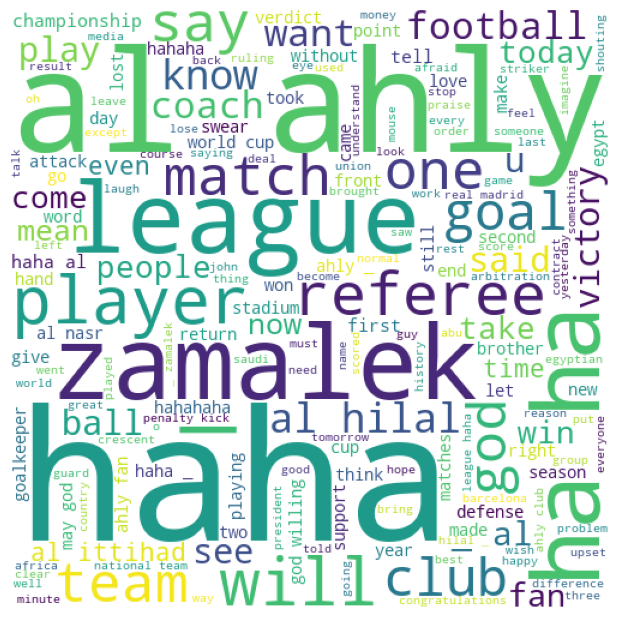

In [16]:
# Visualising the fake dataset
stopwords = set(STOPWORDS) 

fake_words = list(fake_data['tweet'])
string_fake_words = " ".join(fake_words)

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

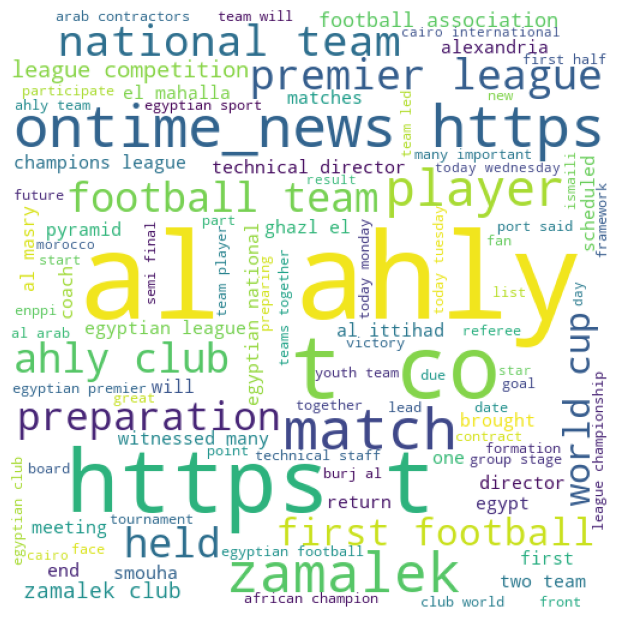

In [17]:
# Visualising the real dataset
stopwords = set(STOPWORDS) 

true_words = list(real_data['tweet'])
string_true_words = " ".join(true_words)

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_true_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Concatenating of the two datasets

In [18]:
data = pd.concat([fake_data, real_data], ignore_index=True, sort=False)

In [19]:
check_shape(data)
data.sample(10)


Number of rows in dataset: 41851

Number of columns in dataset: 2


,tweet,label
945,"the end of a match, a difficult match against ...",0
1801,"hahaha, the referee, jani sikazoy, who officia...",0
1822,\nthis is a nerve after al-ittihad defeated th...,0
5630,"i started to love football, haha, with the wor...",0
2515,"al-ittihad won, i went to the football exercis...",0
22074,"the serbian zoran manolovic, coach of the firs...",1
20571,egyptian salma hany competes in the semi-final...,1
37516,hisham hanafi: those around muhammad sharif ar...,1
23273,fans of the round witch are waiting for the si...,1
26519,zamalek finished the first half of its match a...,1


# Pre-processing of the dataset

In [20]:
#nlp pre-processing
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet 

In [21]:
stopwords = nltk.corpus.stopwords.words('english')

lemmatizer=WordNetLemmatizer()

for index,row in data.iterrows():
    filtered_tweet = ''
    
    tweet = re.sub(r'[^\w\s]','',row['tweet']) # Removes punctuation and special characters
    tweet = re.sub(r'_','',row['tweet']) # Removes underscore
    
    words = nltk.word_tokenize(tweet) # Tokenization
    
    words = [w for w in words if not w in stopwords]  # Removes stopwords
    
    for word in words:
        filtered_tweet += ' ' + str(lemmatizer.lemmatize(word)).lower() # Lemmatization
        
    data.loc[index,'tweet'] = filtered_tweet

In [22]:
data.sample(10)

,tweet,label
22801,"ahmed al-sheikh , al-mahalla player , maintai...",1
22864,"mohamed salah , former star zamalek : hope de...",1
35999,abu qir fertilizer official succeeded strengt...,1
7698,honey heart defeat jeddah pier arbitration er...,0
21331,alexandrian federation notified mohamed mahmo...,1
23346,tariq yahya reduces physical load zamalek pla...,1
38602,zamalek title holder last edition egyptian le...,1
28323,zamalek welcome loan junior next season free ...,1
37493,"ahmed al-fadli , egyptian ambassador south af...",1
7424,shape team one want get used atmosphere ? rem...,0


# Feature Extraction using TfidVectorizer

In [23]:
#vectorizers and splitting
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [24]:
tfidf_vectorizer = TfidfVectorizer(norm='l2', use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['tweet'])

# Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['label'], random_state=0)

check_shape(X_train)
check_shape(X_test)


Number of rows in dataset: 31388

Number of columns in dataset: 24330

Number of rows in dataset: 10463

Number of columns in dataset: 24330


In [26]:
collect_results_of_all_model= {
    'Metrics':['accuracy','precision','recall','f1-score']
}#dic form store results of all models

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix,precision_score,f1_score,recall_score,plot_roc_curve

In [28]:
RF = RandomForestClassifier(n_estimators=50)
RF_model = RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

In [29]:
#Results
RF_accuracy = accuracy_score(y_test, RF_pred)
RF_precision = precision_score(y_test, RF_pred)
RF_f1score = f1_score(y_test, RF_pred)
RF_recall = recall_score(y_test, RF_pred)

print("Random Forest: Performance Metric\n\n")
print("Accuracy: {:.2f}%".format(RF_accuracy*100))
print("Precision: {:.2f}%".format(RF_precision*100))
print("F1 Score: {:.2f}%".format(RF_f1score*100))
print("Recall: {:.2f}%".format(RF_recall*100))


Random Forest: Performance Metric


Accuracy: 94.54%
Precision: 95.05%
F1 Score: 94.75%
Recall: 94.44%


========== RF_Classifier ==========

Accuracy on validation set: 0.9454

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      5012
           1       0.95      0.94      0.95      5451

    accuracy                           0.95     10463
   macro avg       0.95      0.95      0.95     10463
weighted avg       0.95      0.95      0.95     10463


Confusion Matrix : 
 [[4744  268]
 [ 303 5148]]


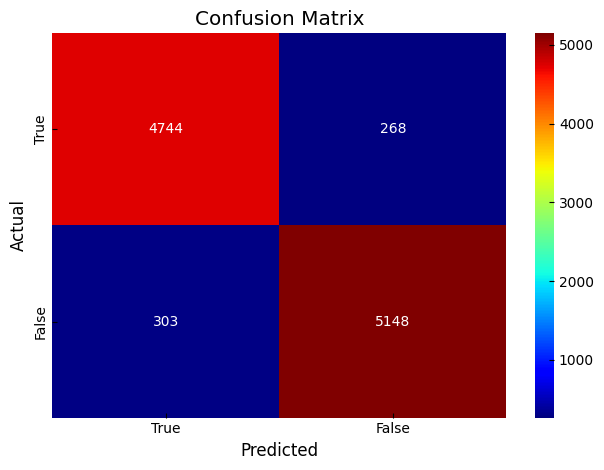

In [30]:
RF_res=modelEvaluation(RF_pred, y_test, 'RF_Classifier')
collect_results_of_all_model["RF_Classifier"] = RF_res

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR = LogisticRegression()
LR_model = LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [33]:
#Results
LR_accuracy = accuracy_score(y_test, LR_pred)
LR_precision = precision_score(y_test, LR_pred)
LR_f1score = f1_score(y_test, LR_pred)
LR_recall = recall_score(y_test, LR_pred)

print("Logistic Regression: Performance Metric\n\n")
print("Accuracy: {:.2f}%".format(LR_accuracy*100))
print("Precision: {:.2f}%".format(LR_precision*100))
print("F1 Score: {:.2f}%".format(LR_f1score*100))
print("Recall: {:.2f}%".format(LR_recall*100))


Logistic Regression: Performance Metric


Accuracy: 94.71%
Precision: 95.50%
F1 Score: 94.89%
Recall: 94.28%


========== LR_Classifier ==========

Accuracy on validation set: 0.9471

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      5012
           1       0.96      0.94      0.95      5451

    accuracy                           0.95     10463
   macro avg       0.95      0.95      0.95     10463
weighted avg       0.95      0.95      0.95     10463


Confusion Matrix : 
 [[4770  242]
 [ 312 5139]]


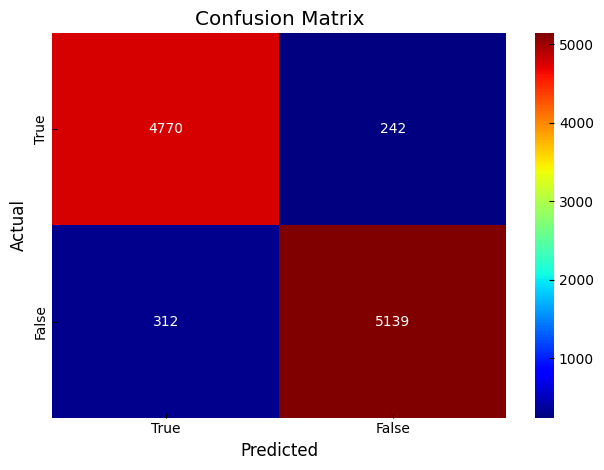

In [34]:
LR_res=modelEvaluation(LR_pred, y_test, 'LR_Classifier')
collect_results_of_all_model["LR_Classifier"] = LR_res

# Naive Bayes

In [35]:
from sklearn import naive_bayes

In [36]:
NB = naive_bayes.MultinomialNB()
NB_model = NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)

In [37]:
#Results
NB_accuracy = accuracy_score(y_test, NB_pred)
NB_precision = precision_score(y_test, NB_pred)
NB_f1score = f1_score(y_test, NB_pred)
NB_recall = recall_score(y_test, NB_pred)

print("Naive Bayes: Performance Metric\n\n")
print("Accuracy: {:.2f}%".format(NB_accuracy*100))
print("Precision: {:.2f}%".format(NB_precision*100))
print("F1 Score: {:.2f}%".format(NB_f1score*100))
print("Recall: {:.2f}%".format(NB_recall*100))


Naive Bayes: Performance Metric


Accuracy: 93.91%
Precision: 95.04%
F1 Score: 94.10%
Recall: 93.18%


========== NB_Classifier ==========

Accuracy on validation set: 0.9391

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      5012
           1       0.95      0.93      0.94      5451

    accuracy                           0.94     10463
   macro avg       0.94      0.94      0.94     10463
weighted avg       0.94      0.94      0.94     10463


Confusion Matrix : 
 [[4747  265]
 [ 372 5079]]


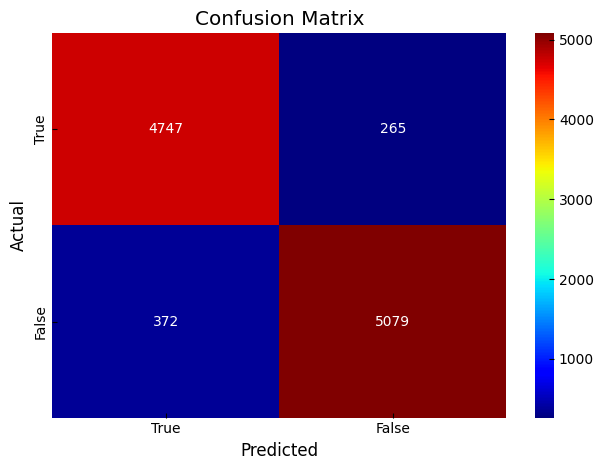

In [38]:
NB_res=modelEvaluation(NB_pred, y_test, 'NB_Classifier')
collect_results_of_all_model["NB_Classifier"] = NB_res

# Support Vector Machines

In [39]:
from sklearn.svm import SVC

In [40]:
SVM = SVC(kernel='linear')
SVM_model = SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)

In [41]:
#Results
SVM_accuracy = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred)
SVM_f1score = f1_score(y_test, SVM_pred)
SVM_recall = recall_score(y_test, SVM_pred)

print("Support Vector Machines: Performance Metric\n\n")
print("Accuracy: {:.2f}%".format(SVM_accuracy*100))
print("Precision: {:.2f}%".format(SVM_precision*100))
print("F1 Score: {:.2f}%".format(SVM_f1score*100))
print("Recall: {:.2f}%".format(SVM_recall*100))


Support Vector Machines: Performance Metric


Accuracy: 95.17%
Precision: 95.53%
F1 Score: 95.36%
Recall: 95.19%


========== SVM_Classifier ==========

Accuracy on validation set: 0.9517

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      5012
           1       0.96      0.95      0.95      5451

    accuracy                           0.95     10463
   macro avg       0.95      0.95      0.95     10463
weighted avg       0.95      0.95      0.95     10463


Confusion Matrix : 
 [[4769  243]
 [ 262 5189]]


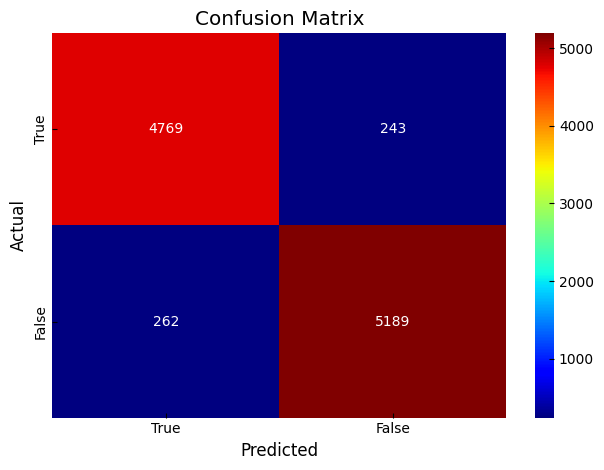

In [42]:
SVM_res=modelEvaluation(SVM_pred, y_test, 'SVM_Classifier')
collect_results_of_all_model["SVM_Classifier"] = SVM_res

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

In [45]:
#Results
DT_accuracy = accuracy_score(y_test, DT_pred)
DT_precision = precision_score(y_test, DT_pred)
DT_f1score = f1_score(y_test, DT_pred)
DT_recall = recall_score(y_test, DT_pred)

print("Decision Tree: Performance Metric\n\n")
print("Accuracy: {:.2f}%".format(DT_accuracy*100))
print("Precision: {:.2f}%".format(DT_precision*100))
print("F1 Score: {:.2f}%".format(DT_f1score*100))
print("Recall: {:.2f}%".format(DT_recall*100))


Decision Tree: Performance Metric


Accuracy: 89.99%
Precision: 90.46%
F1 Score: 90.39%
Recall: 90.31%


========== DT_Classifier ==========

Accuracy on validation set: 0.8999

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      5012
           1       0.90      0.90      0.90      5451

    accuracy                           0.90     10463
   macro avg       0.90      0.90      0.90     10463
weighted avg       0.90      0.90      0.90     10463


Confusion Matrix : 
 [[4493  519]
 [ 528 4923]]


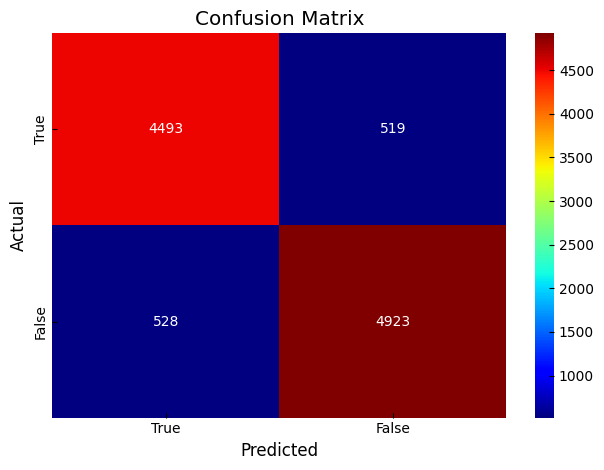

In [46]:
DT_res=modelEvaluation(DT_pred, y_test, 'DT_Classifier')
collect_results_of_all_model["DT_Classifier"] = DT_res

# RNN (Proposed Model)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [48]:
#normalization
import re

def normalize(text):
    #Convert to lowercase
    text = text.lower()
    
    #Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    #Replace non-word characters with spaces
    text = re.sub(r'\W', ' ', text)
    
    #Remove extra spaces and newline characters
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['tweet'] = data['tweet'].apply(normalize)

#after normalizing
data.sample(10)

,tweet,label
25285,tell expectation smouha al ahly match,1
27752,ismaili club s medical staff headed magdy el b...,1
12200,verdict one haha,0
19914,city dice face lapisig german football hope fa...,0
17414,penalty zamalek player 6 1 coincidence right haha,0
9669,medium understand zamalek play lusail cup open...,0
32840,mohamed magdy afsha al ahly player missed pena...,1
2050,president zamalek club mortada mansour verdict...,0
17558,congratulation great people al ahly victory,0
25336,dr 13 sure chance al ahly made ali maaloul wal...,1


In [49]:
#splitting data

RNN_x_train, RNN_x_test, RNN_y_train, RNN_y_test = train_test_split(data['tweet'], data['label'], test_size=0.20, random_state=18)

In [50]:
#tokenization

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(RNN_x_train)

word_index = tokenizer.word_index

RNN_x_train = tokenizer.texts_to_sequences(RNN_x_train)
RNN_x_test = tokenizer.texts_to_sequences(RNN_x_test)

In [51]:
#padding 
RNN_x_train = pad_sequences(RNN_x_train, padding='post', maxlen=256)
RNN_x_test = pad_sequences(RNN_x_test, padding='post', maxlen=256)

In [52]:
#utilizing pretrained word embeddings
embedding_dim = 200
vocab_size = len(word_index) + 1
embeddings_index = {}

with open('glove.twitter.27B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
       
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [53]:
# Building the model

RNN_model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=256, trainable=False),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(16)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 200)          4333400   
                                                                 
 bidirectional (Bidirectiona  (None, 256, 128)         135680    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [54]:
#compiling the model

RNN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [55]:
#training the model

history = RNN_model.fit(RNN_x_train, RNN_y_train, epochs=12,validation_split=0.2, batch_size=32, shuffle=True,) 

D:\Anaconda\envs\MLvenv\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/12
837/837 [==============================] - 100s 113ms/step - loss: 0.2208 - accuracy: 0.9137 - val_loss: 0.1697 - val_accuracy: 0.9338
Epoch 2/12
837/837 [==============================] - 101s 121ms/step - loss: 0.1366 - accuracy: 0.9469 - val_loss: 0.1410 - val_accuracy: 0.9446
Epoch 3/12
837/837 [==============================] - 102s 122ms/step - loss: 0.1074 - accuracy: 0.9606 - val_loss: 0.1355 - val_accuracy: 0.9452
Epoch 4/12
837/837 [==============================] - 102s 121ms/step - loss: 0.0839 - accuracy: 0.9681 - val_loss: 0.1533 - val_accuracy: 0.9440
Epoch 5/12
837/837 [==============================] - 103s 123ms/step - loss: 0.0630 - accuracy: 0.9765 - val_loss: 0.1694 - val_accuracy: 0.9456
Epoch 6/12
837/837 [==============================] - 107s 128ms/step - loss: 0.0483 - accuracy: 0.9817 - val_loss: 0.1706 - val_accuracy: 0.9498
Epoch 7/12
837/837 [==============================] - 103s 123ms/step - loss: 0.0347 - accuracy: 0.9872 - val_loss: 0.1791 -

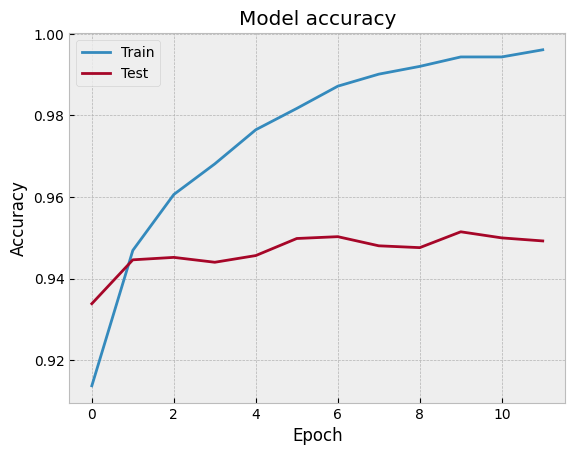

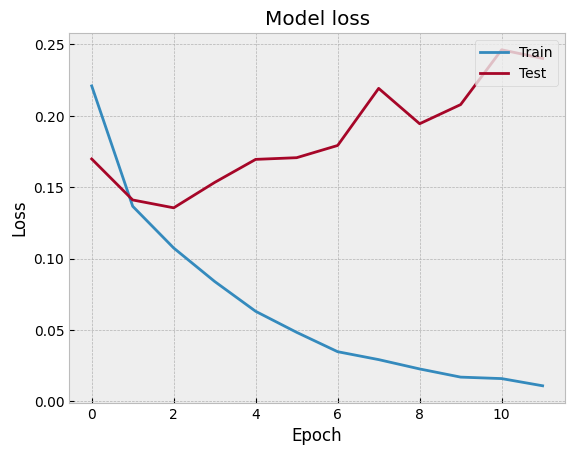

In [56]:
#Visualizing the results

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [57]:
RNN_model.evaluate(RNN_x_test, RNN_y_test)

262/262 [==============================] - 17s 64ms/step - loss: 0.2084 - accuracy: 0.9538


[0.20836029946804047, 0.9537689685821533]

In [58]:
RNN_pred = RNN_model.predict(RNN_x_test)
binary_pred = np.where(RNN_pred >= 0.5, 1, 0)

262/262 [==============================] - 15s 54ms/step


In [59]:
#Results
RNN_accuracy = accuracy_score(RNN_y_test, binary_pred)
RNN_precision = precision_score(RNN_y_test, binary_pred)
RNN_f1score = f1_score(RNN_y_test, binary_pred)
RNN_recall = recall_score(RNN_y_test, binary_pred)

print("Proposed RNN Model: Performance Metric\n\n")
print("Accuracy: {:.2f}%".format(RNN_accuracy*100))
print("Precision: {:.2f}%".format(RNN_precision*100))
print("F1 Score: {:.2f}%".format(RNN_f1score*100))
print("Recall: {:.2f}%".format(RNN_recall*100))


Proposed RNN Model: Performance Metric


Accuracy: 95.38%
Precision: 95.01%
F1 Score: 95.64%
Recall: 96.28%


========== RNN_Classifier ==========

Accuracy on validation set: 0.9538

Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      3960
           1       0.95      0.96      0.96      4411

    accuracy                           0.95      8371
   macro avg       0.95      0.95      0.95      8371
weighted avg       0.95      0.95      0.95      8371


Confusion Matrix : 
 [[3737  223]
 [ 164 4247]]


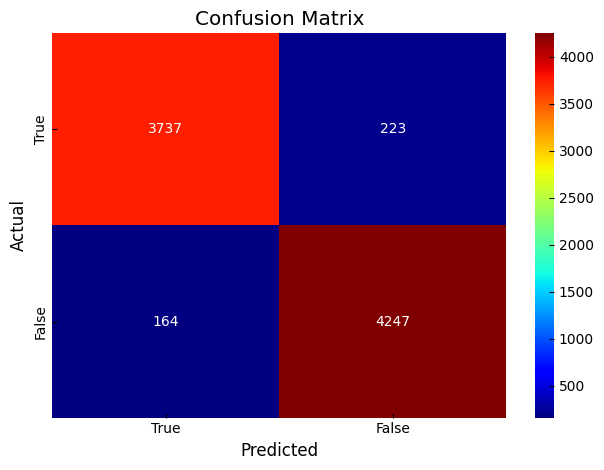

In [60]:
RNN_res=modelEvaluation(binary_pred, RNN_y_test, 'RNN_Classifier')
collect_results_of_all_model["RNN_Classifier"] = RNN_res

# Results Comparison

In [61]:
from tabulate import tabulate
metrics_data_frame = pd.DataFrame(collect_results_of_all_model)#create dataframe
metrics_data_frame = metrics_data_frame.set_index('Metrics')#set index
# displaying the DataFrame
print(tabulate(metrics_data_frame, headers = 'keys', tablefmt = 'psql'))#convert results in to table

+-----------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+
| Metrics   |   RF_Classifier |   LR_Classifier |   NB_Classifier |   SVM_Classifier |   DT_Classifier |   RNN_Classifier |
|-----------+-----------------+-----------------+-----------------+------------------+-----------------+------------------|
| accuracy  |        0.945427 |        0.947052 |        0.939119 |         0.951735 |        0.899933 |         0.953769 |
| precision |        0.945241 |        0.946817 |        0.938871 |         0.951594 |        0.899736 |         0.954036 |
| recall    |        0.945471 |        0.947239 |        0.939441 |         0.951726 |        0.899793 |         0.953254 |
| f1-score  |        0.945345 |        0.946986 |        0.939057 |         0.951657 |        0.899764 |         0.953597 |
+-----------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+


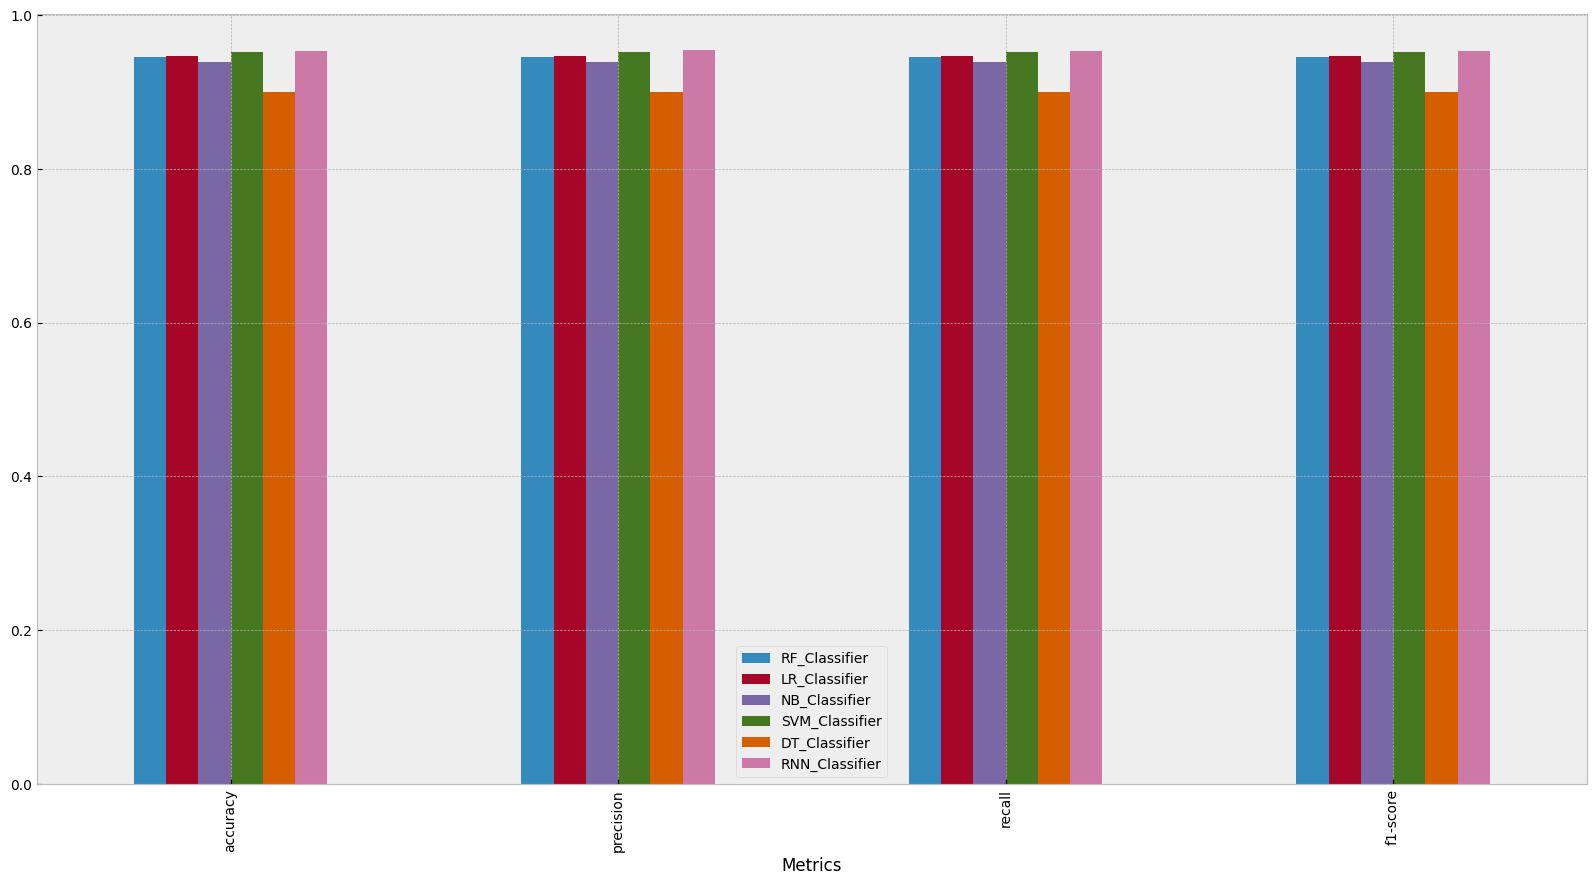

In [62]:
metrics_data_frame.plot(kind='bar', figsize=(20,10))#show comparison base of metrics
plt.show()
